## setup and notebook configuration

In [1]:
import numpy as np

In [2]:
# matplotlib 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as mtri               # delaunay triangulation
from mpl_toolkits.mplot3d import Axes3D     # surface plotting
import seaborn as sns
import cmocean as cmo
sns.set()
%matplotlib inline

/Users/corbin/virtual_envs/FEMexperiment_env/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# local imports
import src.msh.mesh as MESH
import src.handlers.dof_handler as DOFH
import src.fem_base.master.master_2D as MASTER2D
import src.fem_base.master.master_1D as MASTER1D

# overview

# `Mesh2D`

This is the re-written MPU `Mesh2D` class.

In [5]:
tP = np.array(
      [[ 1. ,  2. ,  0. ],
       [ 1. ,  3. ,  0. ],
       [ 1.5,  2. ,  0. ],
       [ 1.6,  3.5,  0. ]])

tT = np.array(
      [[0, 2, 1, -1],
       [2, 3, 1, -1]])

In [6]:
tri_mesh = MESH.Mesh2D(tT, tP)

p=3
master_tri = MASTER2D.Master2DTriangle(p=p)
master_edge = MASTER1D.Master1D(p=p)

In [7]:
tris = tri_mesh.connectivity_by_elm_type("TRIANGLE")
tris

array([[0, 2, 1],
       [2, 3, 1]])

In [8]:
tri_mesh.vert

array([[1. , 2. , 0. ],
       [1. , 3. , 0. ],
       [1.5, 2. , 0. ],
       [1.6, 3.5, 0. ]])

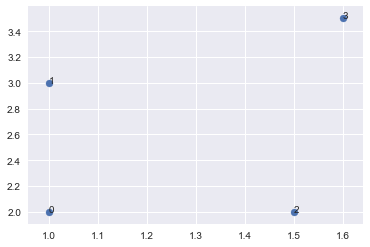

In [9]:
verts = tri_mesh.vert[:,:2]
plt.scatter(verts[:,0], verts[:,1])
for idx, vert in enumerate(verts):
    plt.annotate(xy=(vert[0], vert[1]), s=str(idx))

In [10]:
verts[tris]

array([[[1. , 2. ],
        [1.5, 2. ],
        [1. , 3. ]],

       [[1.5, 2. ],
        [1.6, 3.5],
        [1. , 3. ]]])

In [11]:
elm=1
tuple(verts[tris][elm,::])

(array([1.5, 2. ]), array([1.6, 3.5]), array([1., 3.]))

In [12]:
master_tri.nodal_pts

array([[-1.        ,  1.        ],
       [-0.33333333,  0.33333333],
       [ 0.33333333, -0.33333333],
       [ 1.        , -1.        ],
       [-1.        ,  0.33333333],
       [-0.33333333, -0.33333333],
       [ 0.33333333, -1.        ],
       [-1.        , -0.33333333],
       [-0.33333333, -1.        ],
       [-1.        , -1.        ]])

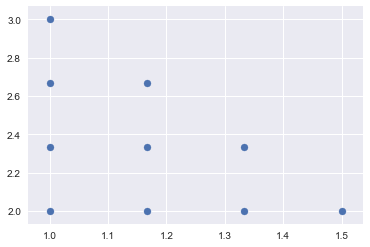

In [13]:
xn = master_tri.map_to_physical_space(verts[tris][0, ::])
plt.scatter(xn[:,0], xn[:,1])

In [14]:
tris = tri_mesh.connectivity_by_elm_type("TRIANGLE")
quads = tri_mesh.connectivity_by_elm_type("QUAD")

In [15]:
tris.size
quads.shape[0]

0

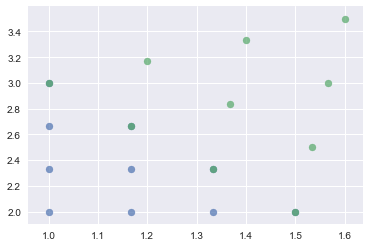

In [26]:
dofh = DOFH.HDG_dofh(n=p, mesh=tri_mesh, master_elms=[master_tri], master_eds=[master_edge])
for elm in range(dofh.n_elm):
    x, y = dofh.dgnodes[0][:,0,elm], dofh.dgnodes[0][:,1,elm]
    plt.scatter(x, y, alpha=0.7)

# `DOFHandler2D`